In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CLV.csv')
data.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
len(data)

303

In [8]:
#descriptive statistics of the dataset
data.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Income/spend')

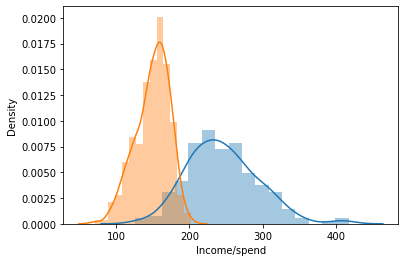

In [16]:
plot_income = sns.distplot(data['INCOME'])
plot_spend = sns.distplot(data['SPEND'])
plt.xlabel('Income/spend')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 420.0)]

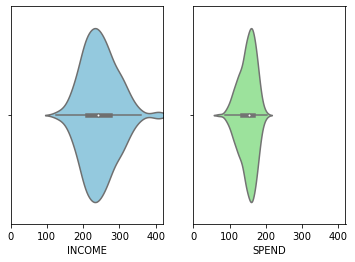

In [29]:
f, axes = plt.subplots(1, 2, sharex=True) 
v1 = sns.violinplot(data['INCOME'], color='skyblue', ax=axes[0])
v2 = sns.violinplot(data['SPEND'], color='lightgreen', ax=axes[1])
v1.set(xlim=(0, 420)) #sharex de v2 cung dung chung cai lim nay
#neu ko set xlim, v1, v2 se hien thi theo max, min

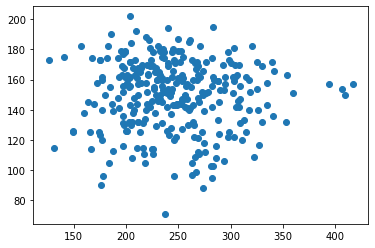

In [37]:
Income = data['INCOME'].values
Spend = data['SPEND'].values
x = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'wcss')

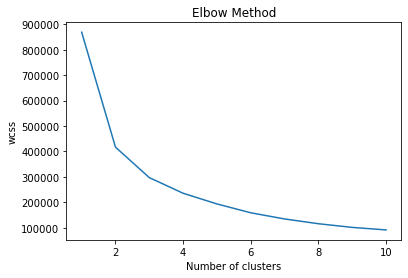

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [44]:
#Based on the elbow plot, we could choose 4,5 or 6 clusters
#with k=4
km4 = KMeans(n_clusters=4)
#Compute cluster centers and predict cluster index for each sample
y_means = km4.fit_predict(x)
y_means

array([0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 3, 0, 1, 0, 1, 2, 3, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 3, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 3, 0, 0, 1,
       1, 3, 0, 1, 0, 2, 1, 3, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 3, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 1, 3, 2, 3, 2, 0, 3, 2, 0, 3, 0, 1, 2, 1, 1, 3, 1, 2, 0, 0,
       3, 0, 1, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 3, 2, 3, 0,
       2, 1, 0, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 0, 3, 0,
       1, 3, 1, 0, 2, 3, 0, 0, 3, 0, 3, 2, 3, 2, 3, 1, 0, 0, 0, 0, 3, 0,
       1, 1, 2, 1, 3, 3, 0, 0, 3, 0, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 3, 3, 1,

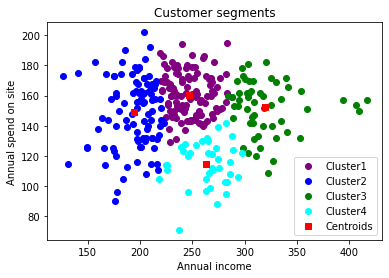

In [57]:
plt.scatter(x[y_means==0, 0], x[y_means==0, 1], c='purple', label='Cluster1')
plt.scatter(x[y_means==1, 0], x[y_means==1, 1], c='blue', label='Cluster2')
plt.scatter(x[y_means==2, 0], x[y_means==2, 1], c='green', label='Cluster3')
plt.scatter(x[y_means==3, 0], x[y_means==3, 1], c='cyan', label='Cluster4')
#mark cluster_centers
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], 
            marker='s', c='red', label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend on site')
plt.legend()

In [58]:
#with k=6
km6 = KMeans(n_clusters=6)
#Compute cluster centers and predict cluster index for each sample
y_means = km6.fit_predict(x)
y_means

array([2, 2, 4, 2, 3, 4, 1, 2, 4, 4, 2, 5, 2, 0, 1, 4, 1, 0, 2, 2, 2, 2,
       2, 2, 4, 1, 4, 0, 3, 4, 4, 0, 4, 2, 0, 4, 1, 2, 2, 3, 1, 2, 4, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 2, 4, 2, 4, 4, 2, 4, 1, 5, 1, 4, 0, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 1, 1, 1, 5, 2, 1, 4,
       4, 5, 2, 4, 4, 1, 0, 0, 3, 2, 1, 2, 2, 2, 4, 2, 4, 0, 2, 2, 2, 2,
       1, 4, 1, 4, 2, 4, 4, 4, 4, 2, 1, 2, 2, 2, 4, 4, 0, 2, 4, 5, 4, 2,
       1, 2, 1, 2, 0, 0, 0, 5, 1, 1, 4, 2, 0, 2, 2, 2, 2, 4, 2, 0, 2, 1,
       4, 0, 2, 4, 0, 4, 2, 1, 4, 4, 4, 5, 0, 2, 2, 4, 2, 2, 1, 4, 0, 0,
       2, 1, 0, 5, 3, 0, 1, 2, 5, 1, 2, 5, 2, 4, 1, 0, 0, 1, 4, 1, 2, 2,
       5, 2, 4, 2, 5, 2, 0, 2, 2, 2, 0, 4, 2, 2, 0, 1, 2, 1, 5, 1, 5, 2,
       3, 0, 1, 1, 5, 0, 5, 0, 1, 1, 2, 5, 1, 5, 1, 1, 1, 1, 1, 1, 5, 2,
       0, 5, 0, 2, 3, 5, 1, 2, 1, 2, 5, 1, 5, 1, 5, 0, 2, 2, 2, 2, 5, 2,
       0, 0, 1, 0, 5, 5, 2, 2, 5, 2, 5, 4, 0, 2, 1, 0, 1, 4, 0, 4, 0, 1,
       4, 2, 1, 0, 4, 1, 2, 4, 0, 0, 0, 0, 5, 5, 0,

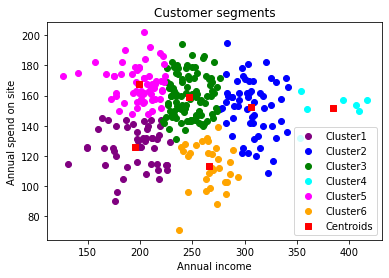

In [60]:
plt.scatter(x[y_means==0, 0], x[y_means==0, 1], c='purple', label='Cluster1')
plt.scatter(x[y_means==1, 0], x[y_means==1, 1], c='blue', label='Cluster2')
plt.scatter(x[y_means==2, 0], x[y_means==2, 1], c='green', label='Cluster3')
plt.scatter(x[y_means==3, 0], x[y_means==3, 1], c='cyan', label='Cluster4')
plt.scatter(x[y_means==4, 0], x[y_means==4, 1], c='magenta', label='Cluster5')
plt.scatter(x[y_means==5, 0], x[y_means==5, 1], c='orange', label='Cluster6')
#mark cluster_centers
plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1], 
            marker='s', c='red', label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend on site')
plt.legend()